<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 180.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 151.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [8]:
## Write your code here
df_cleaned = pd.read_csv(file_path)
num_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows before removal: {num_duplicates}")

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify that duplicates are removed
num_duplicates_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [10]:
## Write your code here
# Count missing values in 'CodingActivities'
missing_coding_activities = df_cleaned['CodingActivities'].isnull().sum()
print(f"Number of missing values in 'CodingActivities': {missing_coding_activities}")


Number of missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [11]:
## Write your code here
# Impute missing values in 'CodingActivities' using forward-fill
df_cleaned['CodingActivities'] = df_cleaned['CodingActivities'].fillna(method='ffill')

# Verify that missing values are filled
missing_after_imputation = df_cleaned['CodingActivities'].isnull().sum()
print(f"Number of missing values in 'CodingActivities' after forward-fill: {missing_after_imputation}")


Number of missing values in 'CodingActivities' after forward-fill: 0


/tmp/ipykernel_299/254035786.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['CodingActivities'] = df_cleaned['CodingActivities'].fillna(method='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [15]:
## Write your code here
# Identify compensation-related columns
comp_columns = [col for col in df_cleaned.columns if "Comp" in col or "Salary" in col]
print("Compensation-related columns found:", comp_columns)

# Describe the main compensation column
if 'ConvertedCompYearly' in comp_columns:
    print("\nDistribution of ConvertedCompYearly:")
    print(df_cleaned['ConvertedCompYearly'].describe())
median_comp = df_cleaned['ConvertedCompYearly'].median()
df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].fillna(median_comp)

Compensation-related columns found: ['CompTotal', 'AIComplex', 'ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore']

Distribution of ConvertedCompYearly:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [16]:
## Write your code here
min_val = df_cleaned['ConvertedCompYearly'].min()
max_val = df_cleaned['ConvertedCompYearly'].max()

df_cleaned['ConvertedCompYearly_MinMax'] = (df_cleaned['ConvertedCompYearly'] - min_val) / (max_val - min_val)

# Display first few rows to check
print(df_cleaned[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [17]:
## Write your code here
# Calculate mean and standard deviation
mean_comp = df_cleaned['ConvertedCompYearly'].mean()
std_comp = df_cleaned['ConvertedCompYearly'].std()

# Apply Z-score normalization
df_cleaned['ConvertedCompYearly_Zscore'] = (df_cleaned['ConvertedCompYearly'] - mean_comp) / std_comp

# Display first few rows to check
print(df_cleaned[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0              65000.0                   -0.067513
1              65000.0                   -0.067513
2              65000.0                   -0.067513
3              65000.0                   -0.067513
4              65000.0                   -0.067513


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


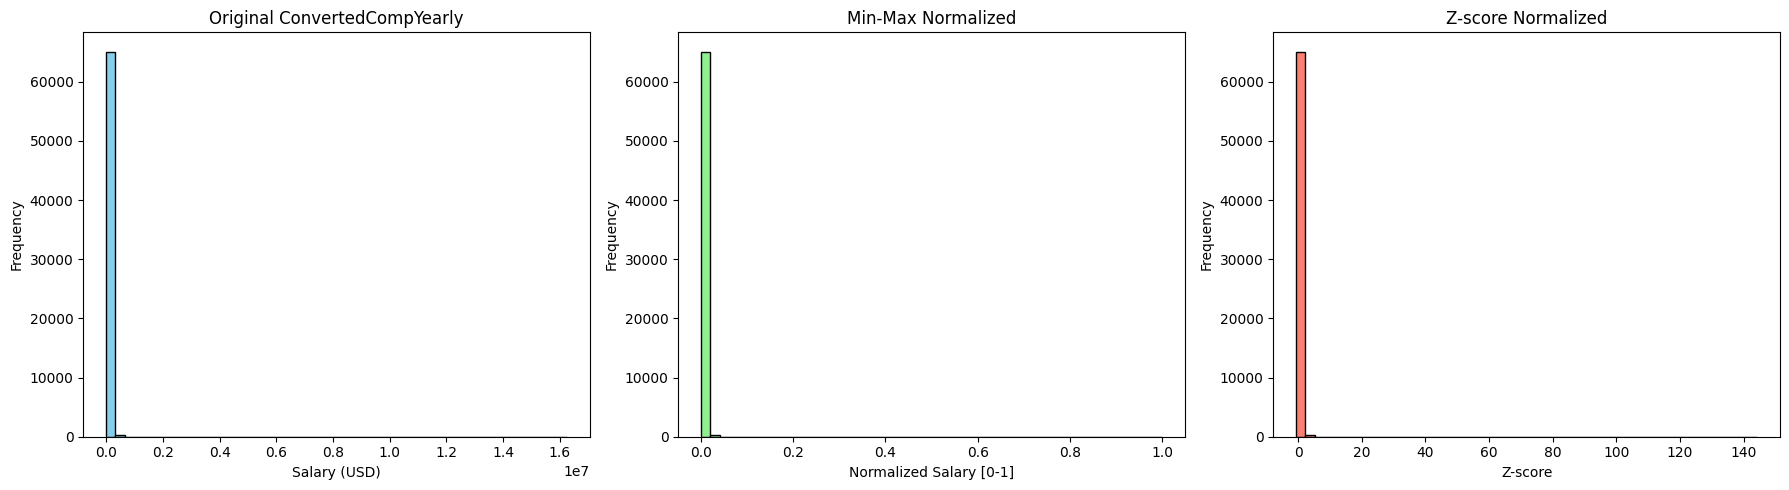

In [18]:
## Write your code here
import matplotlib.pyplot as plt

# Set up figure
plt.figure(figsize=(18,5))

# Original ConvertedCompYearly
plt.subplot(1, 3, 1)
plt.hist(df_cleaned['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title('Original ConvertedCompYearly')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.hist(df_cleaned['ConvertedCompYearly_MinMax'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Min-Max Normalized')
plt.xlabel('Normalized Salary [0-1]')
plt.ylabel('Frequency')

# Z-score Normalized
plt.subplot(1, 3, 3)
plt.hist(df_cleaned['ConvertedCompYearly_Zscore'], bins=50, color='salmon', edgecolor='black')
plt.title('Z-score Normalized')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
